# TP FDMS (Jérémy Lê)

Dans ce TP, nous allons implémenter un modèle Linéaire avec une régularisation L1. Afin de trouver les paramètres du modèle qui minimise la fonction de coût, nous utiliserons l'algorithme itératif de descente de gradient.

Cependant, la norme L0 n'étant pas dérivable, nous ferons une relaxation continue de la norme L0 (qui n'est autre que la norme L1).


## REGULARISATION L1

On commence par importer toutes les fonctions nécessaires à l'implémentation.

    -Numpy : pour le calcul matriciel
    -BaseEstimator,ClassifierMixin: pour implémenter un model sklearn
    -cross_validation: pour valider son model à l'aide d'une validation croisée
    -Matplotlib.pyplot: pour affichage et controle des calculs
    -accuracy_score: pour controler la precision du model
    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

/home/gozuslayer/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


On commence par implémenter l'algorithme de descente de gradient stochastique avec la technique de gradient-clipping.
Pour controler si l'algorithme fonctionne, on affiche la valeur de la fonction coût et l'accuracy

In [4]:
def gradient(X,Y,lamb,epsilone,I):
    l=X.shape[0]
    n=X.shape[1]
    data = np.arange(I)
    grad1 = np.ones([n,1])
    grad2 = np.zeros([n,1])
    for it in range(I):
        for i in range(n):
            idx = np.random.randint(l)
            error = Y[idx]-X[idx,:].dot(grad1)
            A = np.array([2*epsilone*(X[idx,:])*error]).T
            grad2=grad1+A-lamb*np.sign(grad1)
            for j in range(n):
                if grad2[j,0]*grad1[j,0]<0:
                    grad1[j,0]=0
                else:
                    grad1[j,0]=grad2[j,0]
        Ltheta = (1/float(l))*((Y.reshape(150,1)-X.dot(grad1))**2).sum()+lamb*(abs(grad1)).sum()    
        
        data[it]=Ltheta
        accuracy_score(self.predict(X),Y)
        
    return grad1
    
    
    

In [90]:
class RegularisationL1(BaseEstimator,ClassifierMixin):
    """Régularisation L1"""

    def __init__(self,lamb,eps,I):
        self.lamb=lamb
        self.eps=eps
        self.I=I

    def fit(self,X,Y):
        #l correspond aux nombres de données dans notre ensemble d'apprentissage
        #n correspond aux nombres de variables de chaques vecteurs
        l,n=X.shape
        self.data = np.random.randn(self.I,2)
        
        #On initialise les poids
        grad1 = np.random.randn(n,1)
        grad2 = np.random.randn(n,1)
        
        #Calcul du gradient
        for it in range(self.I):
            for i in range(n):
                idx = np.random.randint(l)
                error = Y[idx]-X[idx,:].dot(grad1)
                A = np.array([2*self.eps*(X[idx,:])*error]).T
                grad2=grad1+A-self.lamb*np.sign(grad1)
                for j in range(n):
                    if grad2[j,0]*grad1[j,0]<0:
                        grad1[j,0]=0
                    else:
                        grad1[j,0]=grad2[j,0]
                        
            Ltheta = (1/float(l))*((Y-X.dot(grad1))**2).sum()+self.lamb*(abs(grad1)).sum()    
            self.coef=grad1
            self.data[it,0]=Ltheta
            self.data[it,1]= accuracy_score(self.predict(X),Y)
        return self

    def predict(self,X):
        l=X.shape[0]
        result = X.dot(self.coef)
        result = np.where(result>0.5,1,0)
        return result

In [114]:
from sklearn import datasets
from sklearn import metrics
iris = datasets.load_iris()
X=iris.data
y=iris.target


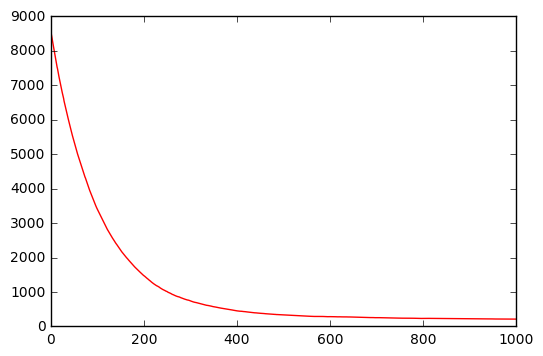

In [116]:
model_l1=RegularisationL1(lamb=0,eps=0.00001,I=1000)
model_l1.fit(X,Y)
plt.plot(range(a.I),a.data[:,0],'r-')
plt.show()

In [117]:
scores = cross_validation.cross_val_score(a,X,Y,cv=5,scoring="accuracy")

In [100]:
scores

array([ 0.5       ,  0.53333333,  0.6       ,  0.3       ,  0.33333333])

In [35]:
class RegularisationL2(BaseEstimator,ClassifierMixin):
    """Régularisation L2"""

    def __init__(self,lamb,eps,I):
        self.lamb=lamb
        self.eps=eps
        self.I=I

    def fit(self,X,Y):
        #l correspond aux nombres de données dans notre ensemble d'apprentissage
        #n correspond aux nombres de variables de chaques vecteurs
        l,n=X.shape
        self.data = np.random.randn(self.I,2)
        
        #On initialise les poids
        grad1 = np.random.randn(n,1)
        grad2 = np.random.randn(n,1)
        
        #Calcul du gradient
        for it in range(self.I):
            for i in range(n):
                idx = np.random.randint(l)
                error = Y[idx]-X[idx,:].dot(grad1)
                A = np.array([2*self.eps*(X[idx,:])*error]).T
                grad2=grad1+A-self.lamb*np.sign(grad1)#TODO
                for j in range(n):
                    if grad2[j,0]*grad1[j,0]<0:
                        grad1[j,0]=0
                    else:
                        grad1[j,0]=grad2[j,0]
            Ltheta = (1/float(l))*((Y-X.dot(grad1))**2).sum()+self.lamb*(abs(grad1)).sum()    
            self.coef=grad1
            self.data[it,0]=Ltheta
            self.data[it,1]= accuracy_score(self.predict(X),Y)
        return self

    def predict(self,X):
        l=X.shape[0]
        result = X.dot(self.coef)
        result = np.where(result>0.5,1,0)
        return result

[ 1.          1.          1.          1.          0.90909091  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.        ]


In [78]:
class RegularisationL1_L2(BaseEstimator,ClassifierMixin):
    """Régularisation combinaison L1 et L2"""

    def __init__(self,lamb1,lamb2,eps,I):
        self.lamb1=lamb1
        self.lamb2=lamb2
        self.eps=eps
        self.I=I

    def fit(self,X,Y):
        #l correspond aux nombres de données dans notre ensemble d'apprentissage
        #n correspond aux nombres de variables de chaques vecteurs
        l,n=X.shape
        self.data = np.random.randn(self.I,2)
        
        #On initialise les poids
        grad1 = np.random.randn(n,1)
        grad2 = np.random.randn(n,1)
        
        #Calcul du gradient
        for it in range(self.I):
            for i in range(n):
                idx = np.random.randint(l)
                error = Y[idx]-X[idx,:].dot(grad1)
                A = np.array([2*self.eps*(X[idx,:])*error]).T
                grad2=grad1+A-self.lamb*np.sign(grad1)#TODO
                for j in range(n):
                    if grad2[j,0]*grad1[j,0]<0:
                        grad1[j,0]=0
                    else:
                        grad1[j,0]=grad2[j,0]
            Ltheta = (1/float(l))*((Y-X.dot(grad1))**2).sum()+self.lamb*(abs(grad1)).sum()    
            self.coef=grad1
            self.data[it,0]=Ltheta
            self.data[it,1]= accuracy_score(self.predict(X),Y)
        return self

    def predict(self,X):
        l=X.shape[0]
        result = X.dot(self.coef)
        result = np.where(result>0.5,1,0)
        return result

In [113]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()

In [118]:
model_lasso.fit(X,Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
scores = cross_validation.cross_val_score(model_lasso,X,Y,cv=5)

In [1]:
	
print range(2**3)

[0, 1, 2, 3, 4, 5, 6, 7]


In [3]:
	
print [i for i in xrange(2**3)]

[0, 1, 2, 3, 4, 5, 6, 7]
